# Coordinate System and Projections
![gcod14](images/gcod14.png)

## The shape of earth

Is it a <h4>Circle???</h4>

![gcod](images/gcod15.jpg)

Or is it a <h4>Sphere???</h4>

![gcod16](images/gcod16.jpg)

It's actually <h4>Oblate Spheroid</h4> <b>bulges at equator and squashed at poles</b>

![gcod17](images/gcod17.jpg)


But for easing mathematical formulations scientists have represented Earth using an Ellipsoidal model. 

![gcod18](images/gcod18.png)

## Latitude and Longitude

Latitude lines run east-west and are parallel to each other. If you go north, latitude values increase. Finally, latitude values (Y-values) range between -90 and +90 degrees.

Longitude lines run north-south. They converge at the poles. And its X-coordinates are between -180 and +180 degrees.


![gcod19](images/gcod19.png)

## What are Map Projections?

While it's best to represent earth as a sphere, flattening them out to two dimensions is more convenient for map making and measuring distances.

![gcod](images/gcod20.png)

**So map projections are used to flatten out the representation of earth to two dimensions.**

But there is a catch, **you can't represent the earth surface in two dimensions with out any distortions (in distance, direction, scale, and area)**. 


An easy way to visualize a map projection is to think of peeling an orange and flattening it out. 

![gcod21](images/gcod21.png)

## Types of Map Projections

### Conic Projections

When you place a cone on the Earth and unwrap it, this results in a conic projection. 

![gcod](images/gcod22.png)

**Good for mapping long east-west regions because distortion is constant along common parallels**.

Scale is preserved while the area is distorted. 

In general, distortion increases north and south of the standard parallel. **Distortion at the poles is so extreme that many maps that use conic projections remove the polar regions**. 

![gcod23](images/gcod23.png)

Some commonly used conic projections include Albers Equal Area Conic and the Lambert Conformal Conic 

### Cylindrical Projections

When you place a cylinder around a globe and unravel it, you get the cylindrical projection.

![gcod](images/gcod24.png)

In cylindrical projections the north is always facing up (which is good!!). It greatly inflates the artic region. 

![gcod25](images/gcod25.png)

Some common examples of cylindrical projections include Mercator, Miller, and many of the State Plane Coordinate System. 

A cool video on the issues of Projection

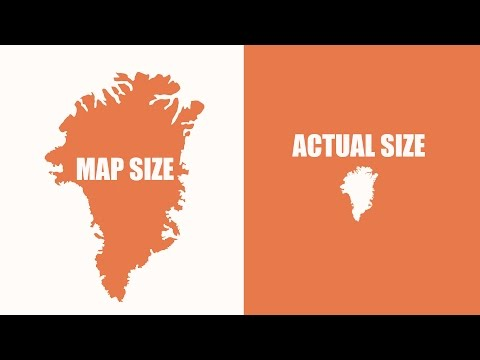

In [21]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('KUF_Ckv8HbE')

Choosing an **appropriate projection** for your map is not always straightforward. It depends on what you **actually want to represent in your map, and what your data’s spatial scale, resolution and extent are**. In fact, there is not a single **‘perfect projection’; each has strengths and weaknesses, and you should choose a projection that fits best for each map**.

## Coordinate reference systems in Geopandas

Let us use a sample dataset for this section

In [22]:
import geopandas as gpd

In [23]:
publicSchools = gpd.read_file('data/Public_Schools_Points_2011-2012A.shp')

In [24]:
publicSchools

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,17K002,K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)
2,21K095,K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.983 156323.361)
3,21K096,K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.681 160709.993)
4,21K097,K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.073 158329.591)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,84Q359,Q,4.0,Q359,Academy of the City Charter School,Elementary,2,30,84,36-14 12TH STREET,NY,11106,None,None,None,"0K,01,SE",QUEENS,POINT (1000974.837 216289.829)
1705,84X538,X,2.0,X538,Icahn Charter School 5,Elementary,2,11,84,1500 PELHAM PARKWAY SOUTH,NY,10461,None,None,None,"0K,01,02,SE",BRONX,POINT (1027676.631 251468.398)
1706,84X539,X,2.0,X539,The New Visions Charter High School for Advanc...,High school,2,10,84,99 TERRACE VIEW AVENUE,NY,10463,None,None,None,"09,SE",BRONX,POINT (1008199.775 259137.237)
1707,84X553,X,2.0,X553,The New Visions Charter High School for the Hu...,High school,2,10,84,99 TERRACE VIEW AVENUE,NY,10463,None,None,None,"09,SE",BRONX,POINT (1008239.820 259105.897)


These are all of the public schools from New York. 

As you can see the geometry column contains Point geometries that seems to have large values for coordinates (not -180 to +180 and -90 to +90). 

Now let's check the projection details of this geodataframe

In [25]:
publicSchools.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As you can see the geospatial data is projected and the projection is NAD83 / New York Long Island (ftUS). There is an EPSG number associated with almost every projection. 

> **EPSG Geodetic Parameter Dataset (also EPSG registry)** is a public registry of geodetic datums, spatial reference systems, Earth ellipsoids, coordinate transformations and related units of measurement, originated by a member of the European Petroleum Survey Group (EPSG) in 1985. Each entity is assigned an EPSG code between 1024–32767 along with a standard machine-readable well-known text (WKT) representation. The dataset is maintained by the IOGP Geomatics Committee.

Now let's see another dataset. 

In [26]:
shootingData = gpd.read_file('data/NYPD_Shooting_Incident_Data_Historic_.shp')

In [27]:
shootingData

,INCIDENT_K,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTI,LOCATION_D,STATISTICA,PERP_AGE_G,PERP_SEX,PERP_RACE,VIC_AGE_GR,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,geometry
0,24050482,08/27/2006,05:35:00,BRONX,52,0.0,None,1,None,None,None,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875000,40.869058,-73.879632,POINT (-73.87963 40.86906)
1,77673979,03/11/2011,12:03:00,QUEENS,106,0.0,None,0,None,None,None,65+,M,WHITE,1.027543e+06,186095.000000,40.677367,-73.843920,POINT (-73.84392 40.67737)
2,203350417,10/06/2019,01:09:00,BROOKLYN,77,0.0,None,0,None,None,None,18-24,F,BLACK,9.953250e+05,185155.000000,40.674886,-73.960075,POINT (-73.96008 40.67489)
3,80584527,09/04/2011,03:35:00,BRONX,40,0.0,None,0,None,None,None,<18,M,BLACK,1.007453e+06,233952.000000,40.808798,-73.916184,POINT (-73.91618 40.80880)
4,90843766,05/27/2013,21:16:00,QUEENS,100,0.0,None,0,None,None,None,18-24,M,BLACK,1.041267e+06,157133.515625,40.597796,-73.794686,POINT (-73.79469 40.59780)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8140,87640227,11/11/2012,23:55:00,BROOKLYN,67,0.0,BAR/NIGHT CLUB,0,None,None,None,18-24,F,BLACK,1.002694e+06,171002.906250,40.636029,-73.933549,POINT (-73.93355 40.63603)
8141,78406428,04/25/2011,15:46:00,BRONX,48,0.0,MULTI DWELL - APT BUILD,0,18-24,M,BLACK,18-24,M,BLACK HISPANIC,1.014132e+06,246056.296875,40.842001,-73.892004,POINT (-73.89200 40.84200)
8142,147275865,10/26/2015,20:50:00,BROOKLYN,67,0.0,None,0,25-44,M,BLACK,25-44,M,BLACK,1.005976e+06,179321.609375,40.658855,-73.921697,POINT (-73.92170 40.65885)
8143,186645750,08/20/2018,20:58:00,BROOKLYN,73,0.0,None,0,None,None,None,<18,M,BLACK,1.006953e+06,184648.937500,40.673475,-73.918158,POINT (-73.91816 40.67347)


Now let's see the projection

In [28]:
shootingData.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As you can see this dataset is un-projected (Geographic coordinates) with an EPSG:4326. 

Now let us plot these two geodataframes

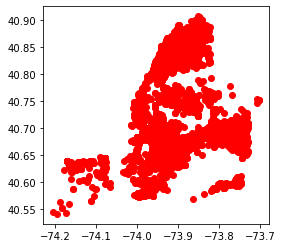

In [29]:
ax = shootingData.plot(marker='o', color='red')

<AxesSubplot:>

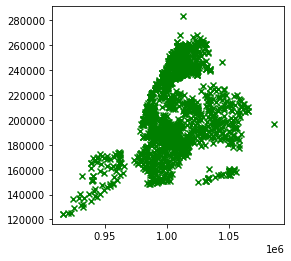

In [30]:
publicSchools.plot(marker='x', color='green')

As you can see from the axes values, both these geodataframes are in entirely different spaces. Now if we want to reproject the public school dataset (EPSG: 2263) to the same projection as the shooting dataset (EPSG: 4326). 

In [31]:
publicSchoolsReproj = publicSchools.to_crs('EPSG:4326')
publicSchoolsReproj

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (-74.01177 40.64915)
1,17K002,K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (-73.95122 40.65642)
2,21K095,K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (-73.97488 40.59574)
3,21K096,K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (-73.98491 40.60779)
4,21K097,K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (-73.98576 40.60125)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,84Q359,Q,4.0,Q359,Academy of the City Charter School,Elementary,2,30,84,36-14 12TH STREET,NY,11106,None,None,None,"0K,01,SE",QUEENS,POINT (-73.93963 40.76033)
1705,84X538,X,2.0,X538,Icahn Charter School 5,Elementary,2,11,84,1500 PELHAM PARKWAY SOUTH,NY,10461,None,None,None,"0K,01,02,SE",BRONX,POINT (-73.84301 40.85679)
1706,84X539,X,2.0,X539,The New Visions Charter High School for Advanc...,High school,2,10,84,99 TERRACE VIEW AVENUE,NY,10463,None,None,None,"09,SE",BRONX,POINT (-73.91340 40.87791)
1707,84X553,X,2.0,X553,The New Visions Charter High School for the Hu...,High school,2,10,84,99 TERRACE VIEW AVENUE,NY,10463,None,None,None,"09,SE",BRONX,POINT (-73.91325 40.87783)


As you can see the geometry column has values that seems to be with in the Geogrpahic range (-180,+180  and -90,+90)

In [32]:
publicSchoolsReproj.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Another way to do it is to use the crs information from the shootingData dataset

In [33]:
publicSchoolsReproj = publicSchools.to_crs(shootingData.crs)
publicSchoolsReproj

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,15K001,K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (-74.01177 40.64915)
1,17K002,K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (-73.95122 40.65642)
2,21K095,K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (-73.97488 40.59574)
3,21K096,K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (-73.98491 40.60779)
4,21K097,K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (-73.98576 40.60125)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,84Q359,Q,4.0,Q359,Academy of the City Charter School,Elementary,2,30,84,36-14 12TH STREET,NY,11106,None,None,None,"0K,01,SE",QUEENS,POINT (-73.93963 40.76033)
1705,84X538,X,2.0,X538,Icahn Charter School 5,Elementary,2,11,84,1500 PELHAM PARKWAY SOUTH,NY,10461,None,None,None,"0K,01,02,SE",BRONX,POINT (-73.84301 40.85679)
1706,84X539,X,2.0,X539,The New Visions Charter High School for Advanc...,High school,2,10,84,99 TERRACE VIEW AVENUE,NY,10463,None,None,None,"09,SE",BRONX,POINT (-73.91340 40.87791)
1707,84X553,X,2.0,X553,The New Visions Charter High School for the Hu...,High school,2,10,84,99 TERRACE VIEW AVENUE,NY,10463,None,None,None,"09,SE",BRONX,POINT (-73.91325 40.87783)


<AxesSubplot:>

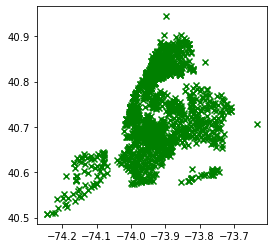

In [34]:
publicSchoolsReproj.plot(marker='x', color='green')

<AxesSubplot:>

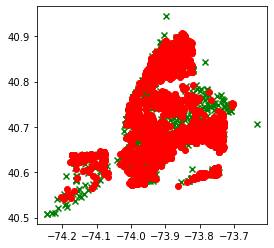

In [35]:
ax = publicSchoolsReproj.plot(marker='x', color='green')
shootingData.plot(marker='o', color='red',ax=ax)

As a cardinal rule, when you are dealing with multiple datasets and performing operations between them, its always good to make sure that all of them are having the same projections. 

In the next chapter we will look into geocoding (the magic of converting adresses to coordinates).